In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,79
reading score,71
writing score,74


In [9]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
student = df.drop(['race/ethnicity', 'parental level of education'], axis=1)
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,completed,59,70,78
1,male,standard,none,96,93,87
2,female,free/reduced,none,57,76,77
3,male,free/reduced,none,70,70,63
4,female,standard,none,83,85,86


In [12]:
list1 = []
for col in student.columns:
    if student[col].dtype != 'object':
        list1.append(col)

In [13]:
list1

['math score', 'reading score', 'writing score']

In [14]:
df1 = df[list1]

In [15]:
df1

,math score,reading score,writing score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86
...,...,...,...
995,77,77,71
996,80,66,66
997,67,86,86
998,80,72,62


In [16]:
corelation = df1.corr()

In [17]:
corelation

,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


<Axes: >

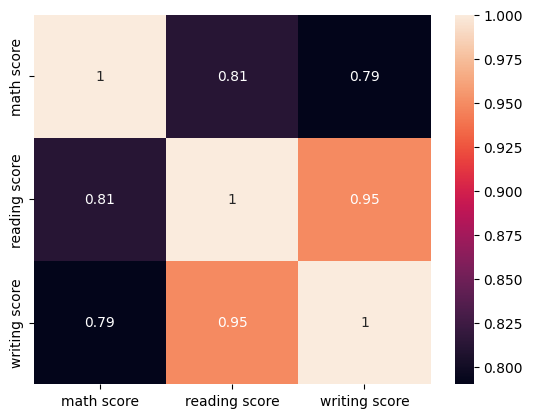

In [18]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

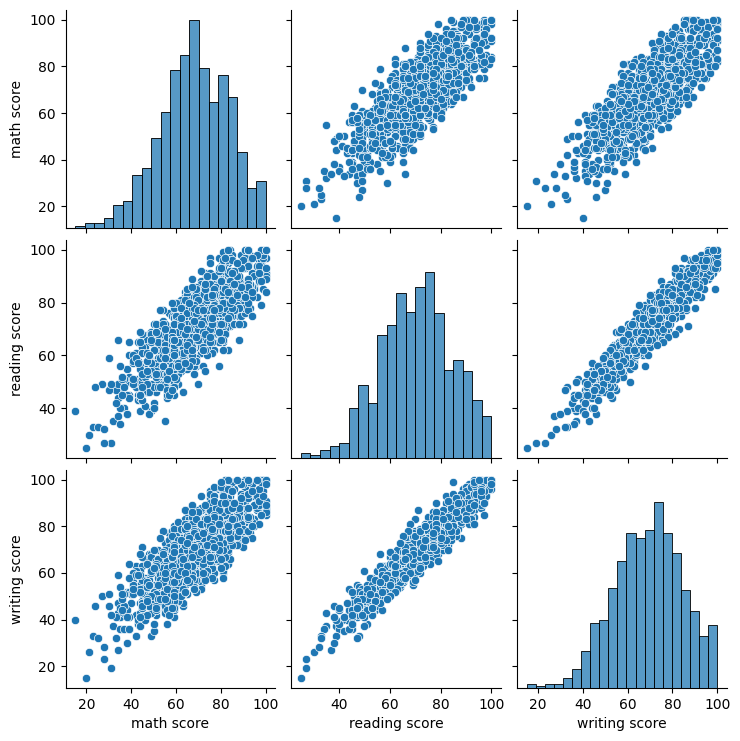

In [19]:
sns.pairplot(df1)

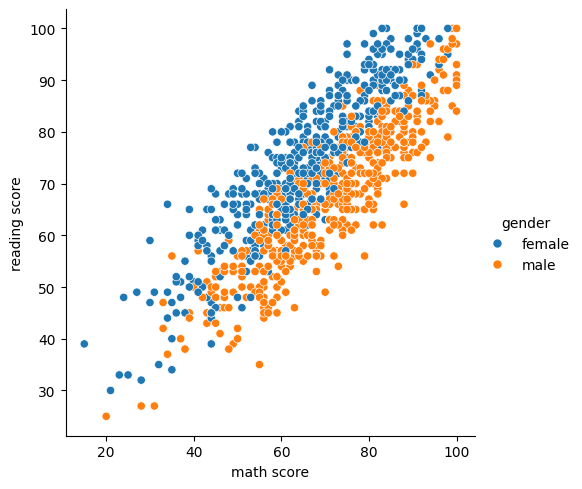

In [20]:
sns.relplot(x='math score', y='reading score', hue='gender', data=student)

<ipython-input-21-b95fc3f5c19f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['math score'])


<Axes: xlabel='math score', ylabel='Density'>

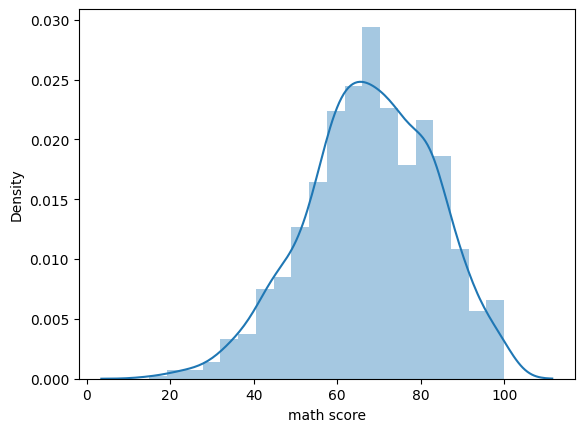

In [21]:
sns.distplot(student['math score'])

<ipython-input-22-617b5b18a158>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

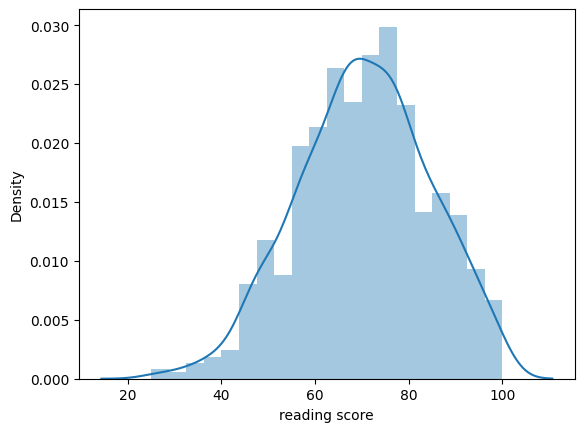

In [22]:
sns.distplot(student['reading score'])

<ipython-input-23-d84a0e6ee089>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

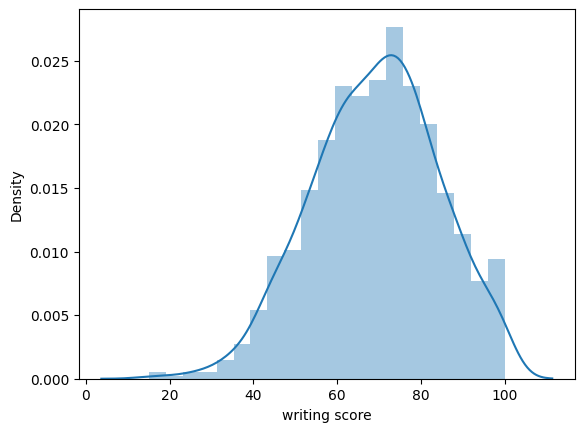

In [23]:
sns.distplot(student['writing score'])

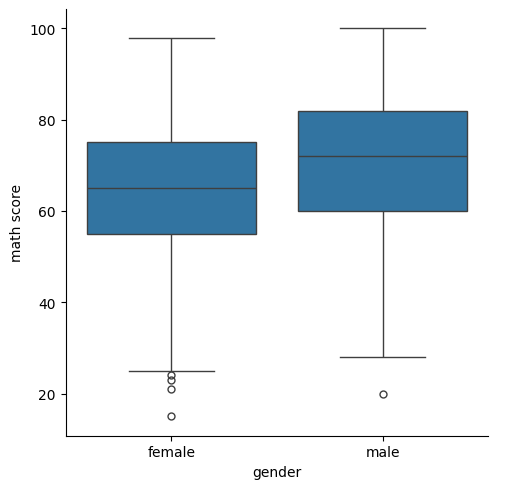

In [24]:
sns.catplot(x='gender', y='math score', kind='box', data=student)

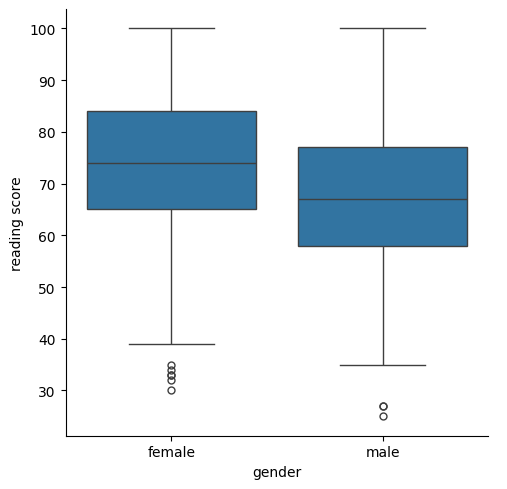

In [25]:
sns.catplot(x='gender', y='reading score', kind='box', data=student)

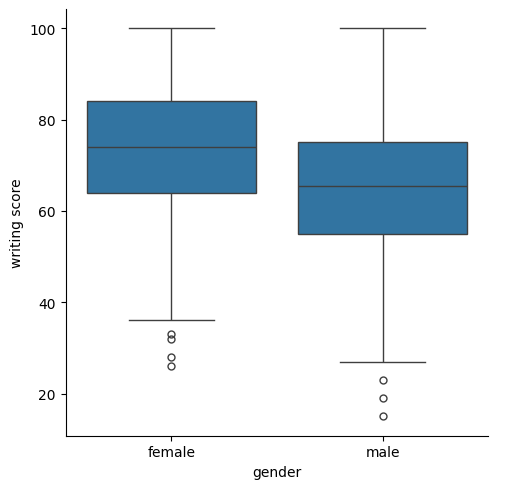

In [26]:
sns.catplot(x='gender', y='writing score', kind='box', data=student)

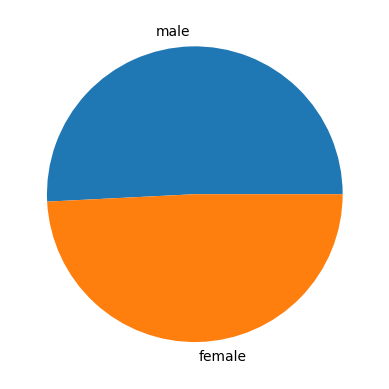

In [27]:
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index)
plt.show()

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
student = np.array(ct.fit_transform(student))

In [29]:
print(student)

[[1.0 0.0 'standard' ... 59 70 78]
 [0.0 1.0 'standard' ... 96 93 87]
 [1.0 0.0 'free/reduced' ... 57 76 77]
 ...
 [1.0 0.0 'standard' ... 67 86 86]
 [0.0 1.0 'standard' ... 80 72 62]
 [0.0 1.0 'standard' ... 58 47 45]]


Correlation between gender and math score: -0.19599205862440247


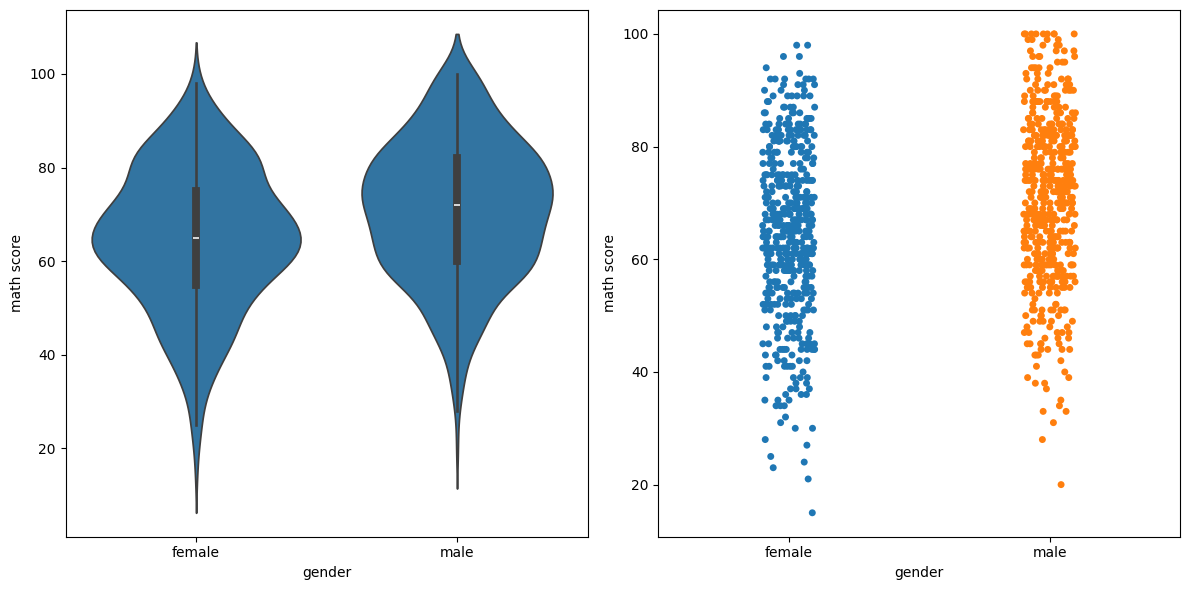

------------------------------------------------------------------------------------------------------------------------------------------------------
Correlation between gender and reading score: 0.21577477792144373


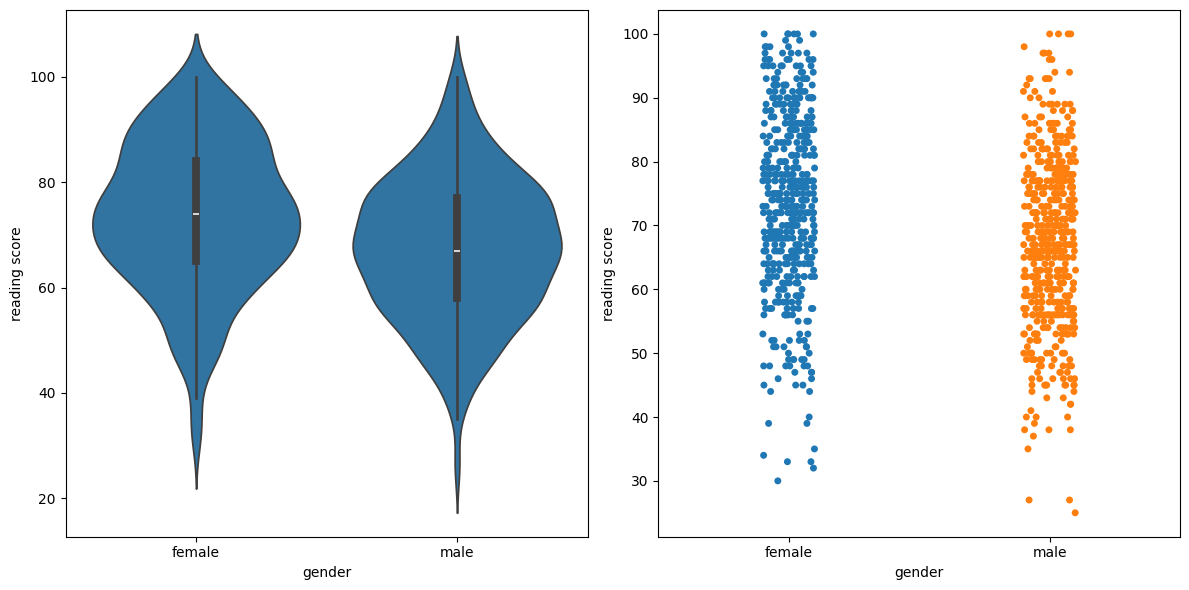

------------------------------------------------------------------------------------------------------------------------------------------------------
Correlation between gender and writing score: 0.281706506583692


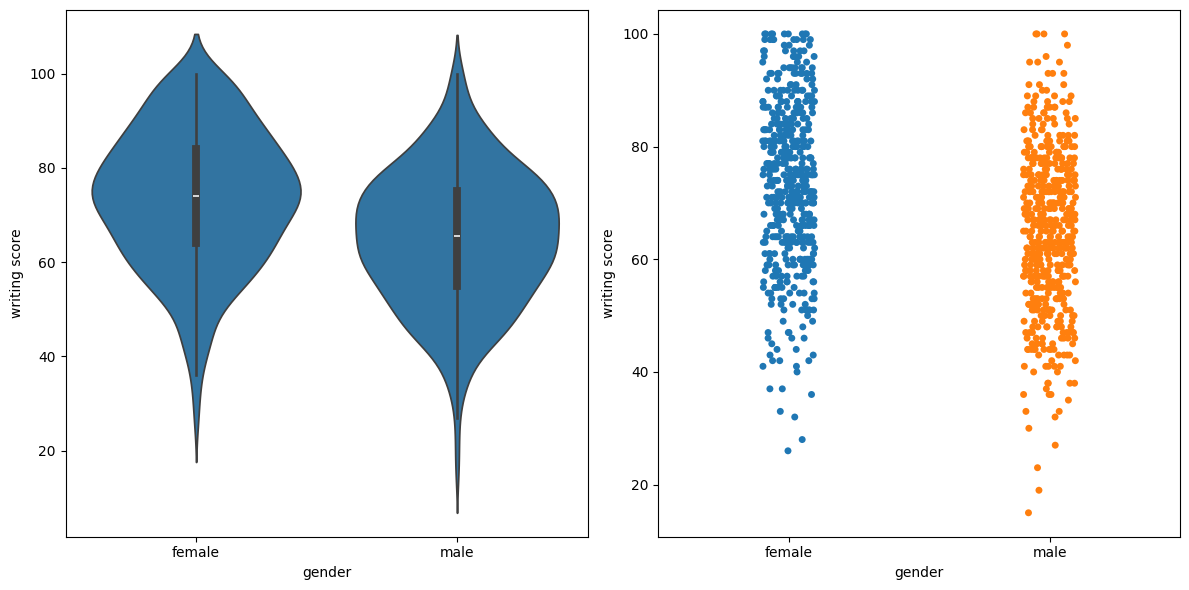

------------------------------------------------------------------------------------------------------------------------------------------------------


In [30]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [df.columns.get_loc('gender')])], remainder='passthrough')
encoded_gender = ct.fit_transform(df[['gender']])

# Add the encoded gender back into the DataFrame for analysis
df['gender_encoded'] = encoded_gender[:, 0]  # Assuming binary encoding, you can adjust this

# Now you can calculate correlations and plot
for column in ['math score', 'reading score', 'writing score']:
    if df[column].dtype != object:  # Check if the column is numeric
        correlation = df['gender_encoded'].corr(df[column])  # Calculate correlation
        print(f"Correlation between gender and {column}: {correlation}")
    else:
        print(f"Correlation cannot be calculated between gender and {column} due to non-numeric data type.")

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.violinplot(data=df, x='gender', y=column)  # Still using original 'gender' for visualization

    plt.subplot(1, 2, 2)
    sns.stripplot(data=df, x='gender', y=column, hue='gender')

    plt.tight_layout()
    plt.show()
    print('-' * 150)
